In [1]:
import glob
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.api import VAR
from datetime import datetime
from meteostat import Stations, Daily


In [2]:
stations = Stations()
stations = stations.nearby(28.7883, -97.01)
station = stations.fetch(1)
print(station)

                        name country region   wmo  icao  latitude  longitude  \
id                                                                             
KPKV0  Port Lavaca / Sixmile      US     TX  <NA>  KPKV   28.6533   -96.6827   

       elevation         timezone hourly_start hourly_end daily_start  \
id                                                                      
KPKV0       10.0  America/Chicago   2006-04-29 2022-11-06  2009-09-24   

       daily_end monthly_start monthly_end      distance  
id                                                        
KPKV0 2022-04-24    2011-01-01  2022-01-01  35270.487184  


In [3]:
# Set time period
start = datetime(2019, 7, 1)
end = datetime(2019, 10, 30)

# Get daily data
temp = Daily('KPKV0', start, end)
temp = temp.fetch()

In [4]:
temp

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
2019-07-01,28.9,25.5,32.6,NaN,NaN,NaN,10.9,NaN,NaN,NaN
2019-07-02,28.5,25.6,33.2,NaN,NaN,NaN,11.4,NaN,NaN,NaN
2019-07-03,28.9,26.1,32.4,NaN,NaN,NaN,14.3,NaN,NaN,NaN
2019-07-04,29.0,24.0,32.9,NaN,NaN,NaN,16.0,NaN,NaN,NaN
2019-07-05,29.8,26.8,33.9,NaN,NaN,156.0,13.2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2019-10-26,14.5,8.1,22.7,NaN,NaN,NaN,12.8,NaN,NaN,NaN
2019-10-27,19.1,11.6,27.3,NaN,NaN,NaN,8.7,NaN,NaN,NaN
2019-10-28,22.6,16.8,28.5,NaN,NaN,NaN,13.4,NaN,NaN,NaN


In [4]:
# setting the path for joining multiple files
files = os.path.join("../data/epa/TXHOURLY", "*tx*.csv")

# list of merged files returned
files = glob.glob(files)

print("Resultant CSV after joining all CSV files at a particular location...");

# joining files with concat and read_csv
df = pd.concat(map(pd.read_csv, files), ignore_index=True)

Resultant CSV after joining all CSV files at a particular location...


In [5]:
def findMaxContData(data: pd.DataFrame, col: str):
    max = -1
    max_idx = -1
    for i in range(len(data)):
        if data[col].iloc[i] > 0:
            for j in range(i, len(data)):
                if (not data[col].iloc[j] > 0) or data["FACILITY_NAME"].iloc[j] != data["FACILITY_NAME"].iloc[i] or data["UNIT_ID"].iloc[j] != data["UNIT_ID"].iloc[i]:
                    if j - i > max:
                        max = j - i
                        max_idx = i
                    break
    return (max_idx, max_idx + max)

In [7]:
findMaxContData(df, "GLOAD (MW)")

KeyboardInterrupt: 

In [6]:
data = df[736:828]
data["OP_DATE"] = pd.to_datetime(data["OP_DATE"])
data = data.merge(temp, left_on="OP_DATE", right_on="time")

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [68]:
data.columns

Index(['STATE', 'FACILITY_NAME', 'ORISPL_CODE', 'UNITID', 'OP_DATE',
       'SUM_OP_TIME', 'COUNT_OP_TIME', 'GLOAD (MWh)', 'SLOAD (1000 lbs)',
       'SO2_MASS (tons)', 'SO2_RATE (lbs/mmBtu)', 'NOX_RATE (lbs/mmBtu)',
       'NOX_MASS (tons)', 'CO2_MASS (tons)', 'CO2_RATE (tons/mmBtu)',
       'HEAT_INPUT (mmBtu)', 'FAC_ID', 'UNIT_ID', 'tavg', 'tmin', 'tmax',
       'prcp', 'snow', 'wdir', 'wspd', 'wpgt', 'pres', 'tsun'],
      dtype='object')

In [7]:
data = data[['OP_DATE','GLOAD (MWh)','SO2_MASS (tons)', 'SO2_RATE (lbs/mmBtu)', 'NOX_RATE (lbs/mmBtu)', 'NOX_MASS (tons)', 'CO2_MASS (tons)', 'CO2_RATE (tons/mmBtu)', 'HEAT_INPUT (mmBtu)', 'tavg', "tmax"]]

In [8]:
data

,OP_DATE,GLOAD (MWh),SO2_MASS (tons),SO2_RATE (lbs/mmBtu),NOX_RATE (lbs/mmBtu),NOX_MASS (tons),CO2_MASS (tons),CO2_RATE (tons/mmBtu),HEAT_INPUT (mmBtu),tavg,tmax
0,2019-07-01,5156.00,0.012,0.001,0.0164,0.322,2331.700,0.059,39232.400,28.9,32.6
1,2019-07-02,5210.00,0.012,0.001,0.0153,0.300,2363.700,0.059,39770.100,28.5,33.2
2,2019-07-03,4641.00,0.011,0.001,0.0165,0.292,2112.500,0.059,35545.100,28.9,32.4
3,2019-07-04,4715.00,0.011,0.001,0.0164,0.294,2147.000,0.059,36127.300,29.0,32.9
4,2019-07-05,5201.00,0.012,0.001,0.0157,0.308,2366.300,0.059,39816.900,29.8,33.9
...,...,...,...,...,...,...,...,...,...,...,...
67,2019-09-17,5260.00,0.012,0.001,0.0162,0.329,2425.000,0.059,40803.200,26.6,30.3
68,2019-09-19,3494.51,0.008,0.001,0.0263,0.276,1622.852,0.059,27311.613,30.2,32.9
69,2019-09-25,5297.00,0.012,0.001,0.0167,0.342,2441.500,0.059,41082.500,28.4,34.2
70,2019-09-26,4981.00,0.011,0.001,0.0169,0.324,2274.700,0.059,38273.800,28.8,33.7


In [9]:
data.to_csv("polutant_cont.csv", index=False)

In [8]:
model = VAR(data)

In [9]:
model.select_order(10)

In [10]:
res = model.fit(maxlags=10, ic='aic')

In [31]:
import statistics
mse = []
for i in range(50, len(data)-1):
    sub_data = data[0:i]
    model = VAR(sub_data)
    res = model.fit(maxlags=3, ic='aic')
    preds = res.forecast(sub_data.values[-1:], 1)
    print(preds)
    mse.append((preds[0][0] - data.values[i])**2)
print(sum(mse)/len(mse))

[[5.22236908e+03 1.20831741e-02 3.99838181e+04 2.89701304e+01
  3.35389813e+01]]
[[5.19185637e+03 1.20169789e-02 3.99434435e+04 2.93683870e+01
  3.33852332e+01]]
[[5.44446941e+03 1.26870003e-02 4.21128998e+04 3.06255194e+01
  3.52186223e+01]]
[[5.39138069e+03 1.25081556e-02 4.17339950e+04 3.08446878e+01
  3.50707118e+01]]
[[5.25780716e+03 1.21424968e-02 4.06112607e+04 2.89861324e+01
  3.29611152e+01]]
[[5.26422553e+03 1.21786312e-02 4.07874214e+04 2.94596193e+01
  3.39330746e+01]]
[[5.36351846e+03 1.24233014e-02 4.15356112e+04 2.99596729e+01
  3.46037296e+01]]
[[5.58351079e+03 1.30073404e-02 4.33946115e+04 3.04781061e+01
  3.54875756e+01]]
[[5.62461173e+03 1.31752118e-02 4.37806432e+04 3.03717721e+01
  3.60110319e+01]]
[[5.35964440e+03 1.25092146e-02 4.15864949e+04 2.98717923e+01
  3.48905009e+01]]
[[5.43702403e+03 1.26130702e-02 4.19077158e+04 3.02429161e+01
  3.49138523e+01]]
[[5.44281626e+03 1.26484223e-02 4.23548708e+04 3.01729307e+01
  3.48809023e+01]]
[[5.42644811e+03 1.26621607e

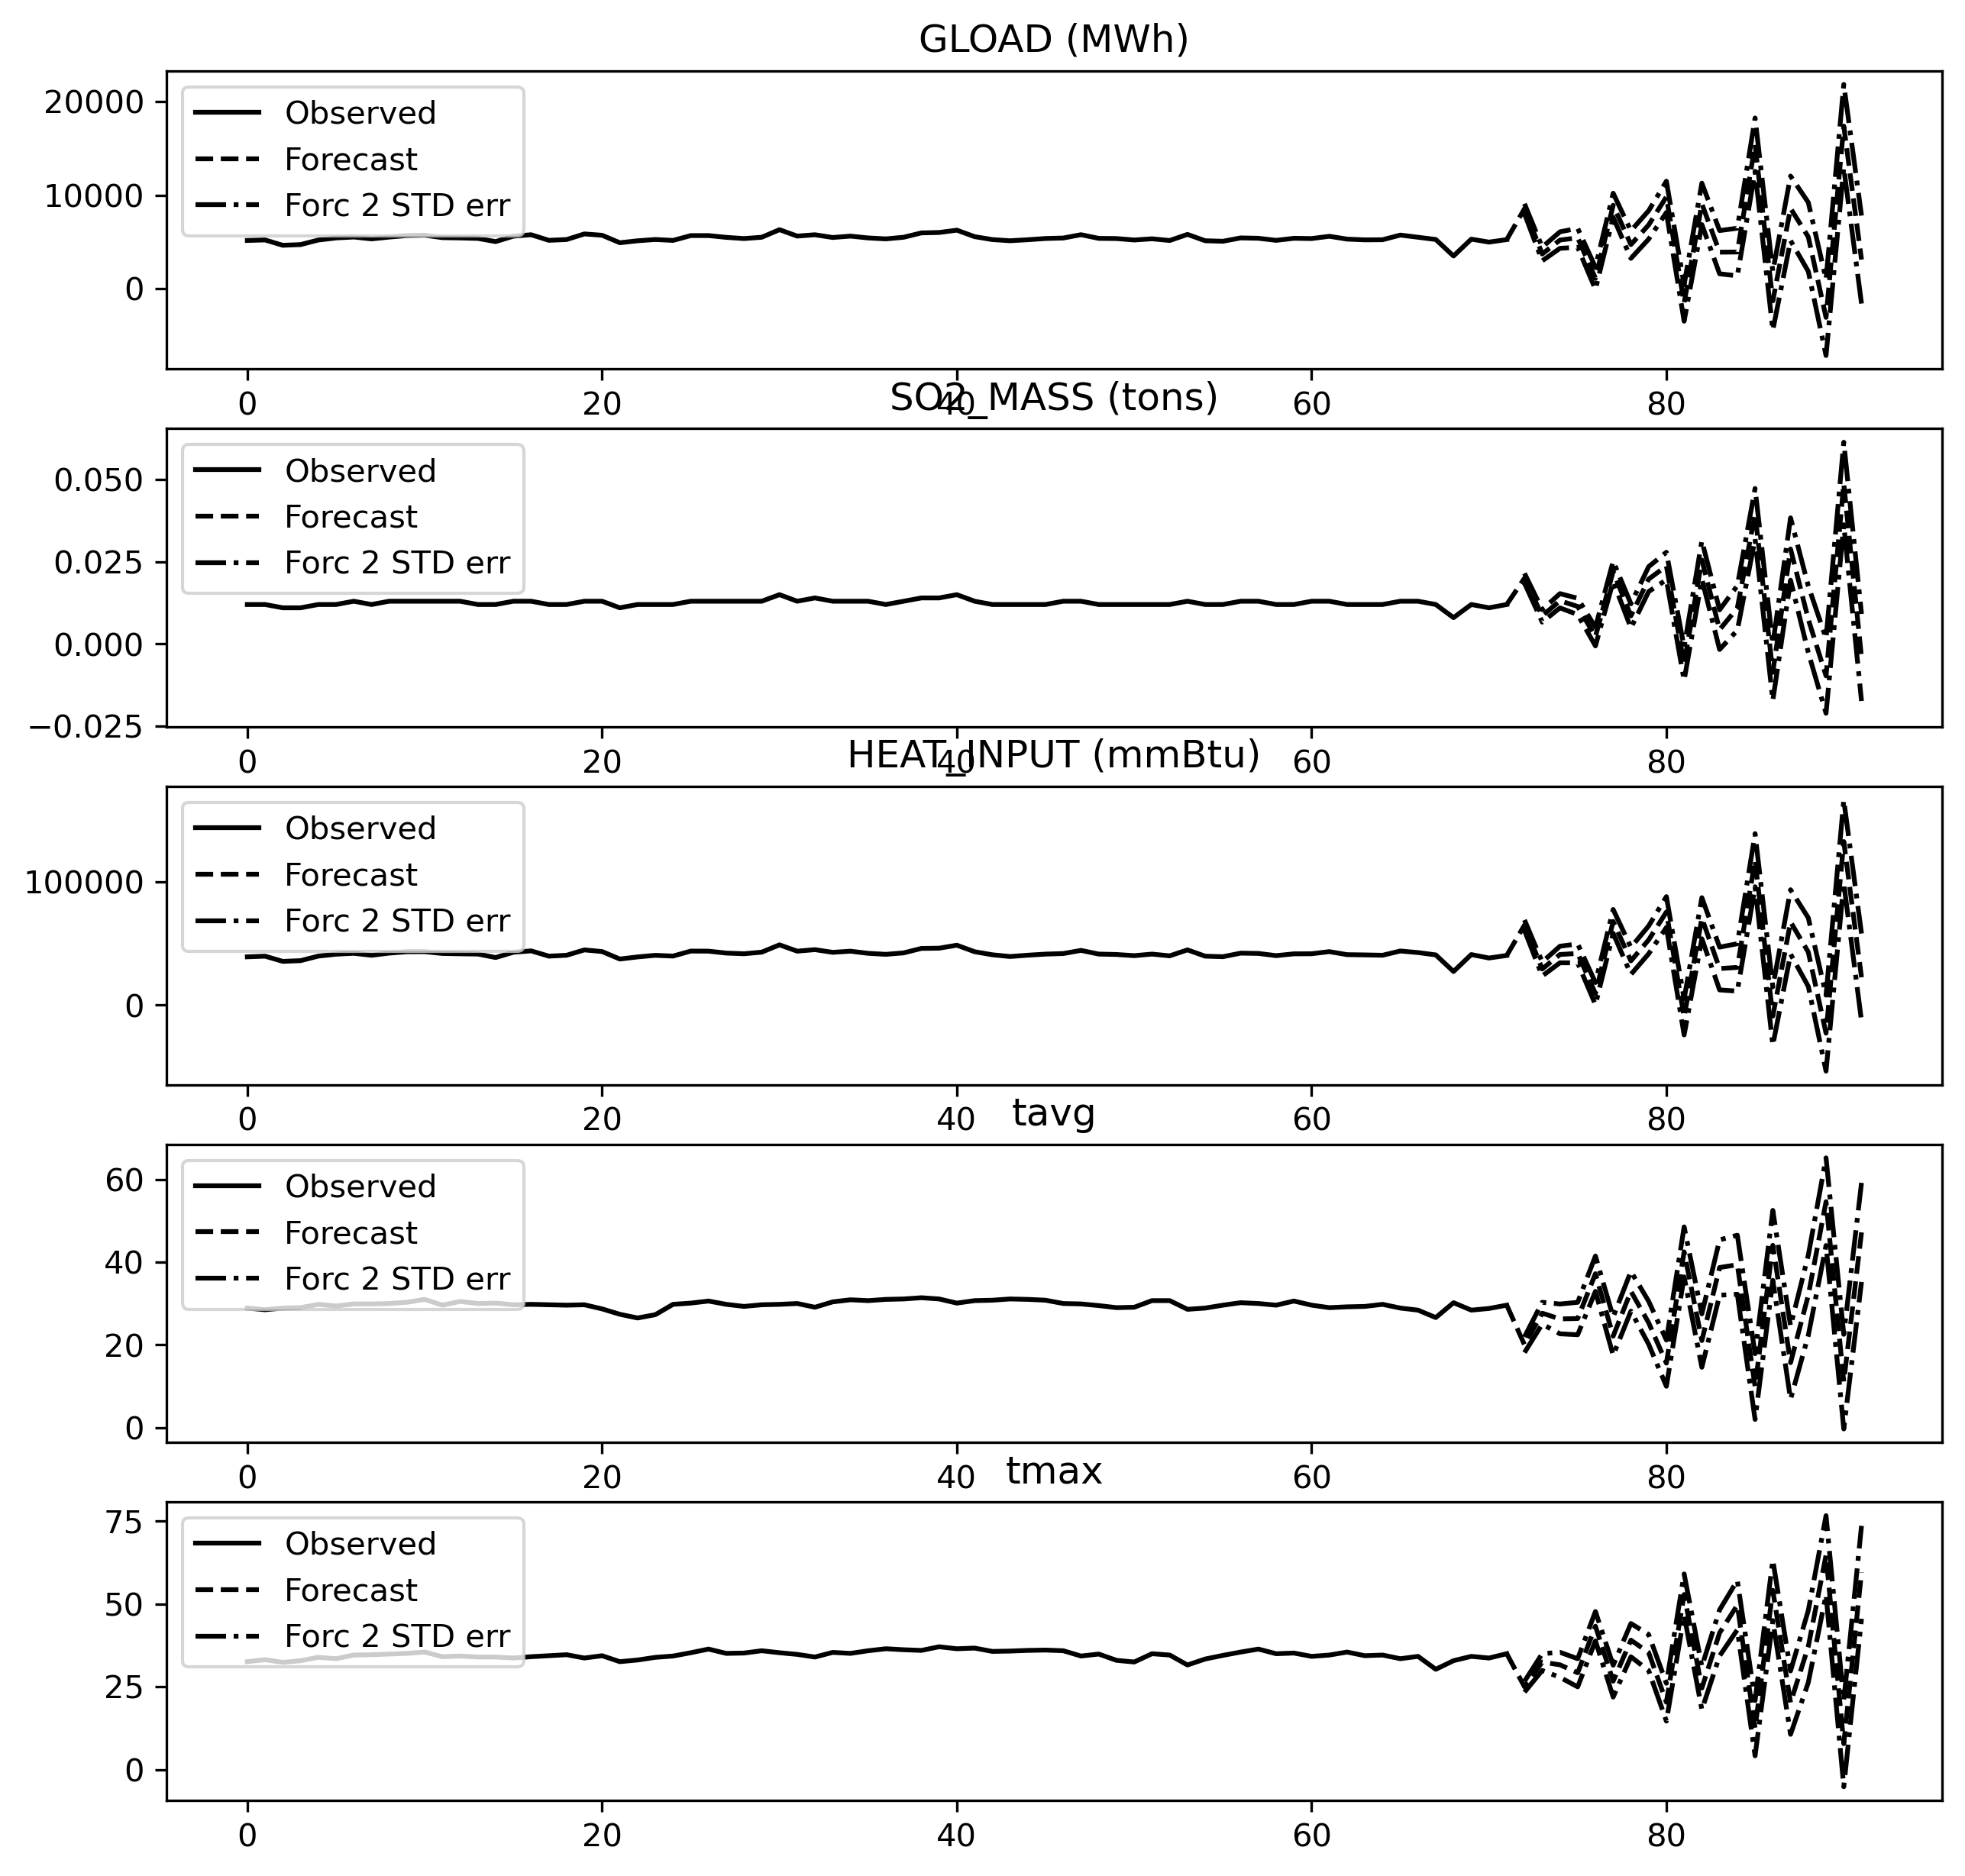

In [89]:
fig = res.plot_forecast(20)
fig.get_axes()[0].legend(loc='upper left')
fig.get_axes()[1].legend(loc='upper left')
fig.get_axes()[2].legend(loc='upper left')
fig.get_axes()[3].legend(loc='upper left')
fig.get_axes()[4].legend(loc='upper left')
fig.set_dpi(300)

<AxesSubplot:>

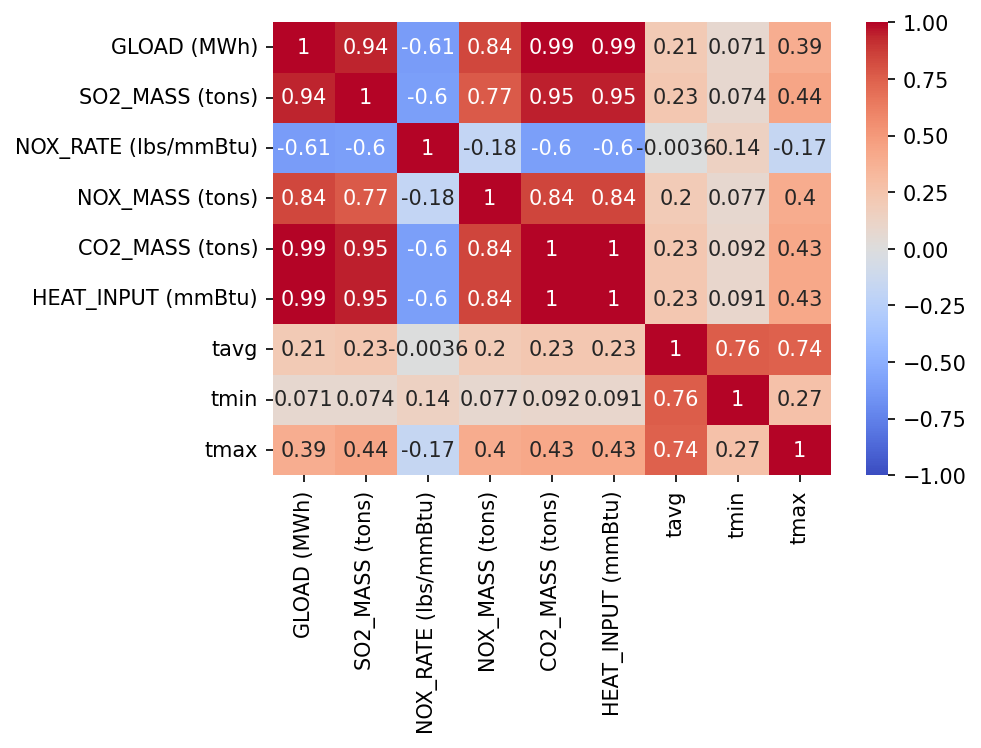

In [77]:
plt.figure(dpi=150)
sns.heatmap(data.corr(), annot=True, vmax=1, vmin=-1, center=0, cmap='coolwarm')
